In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import datetime
import numpy as np
import calendar
%matplotlib inline

In [44]:
movie_data = pd.read_csv("2013_movies copy.csv")

In [11]:
movie_data.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


## Challenge 1

Plot domestic total gross over time.

In [45]:
movie_data['ReleaseDate'] = pd.to_datetime(movie_data['ReleaseDate'])

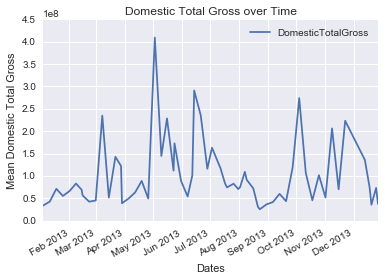

In [49]:
movie_data_lim = movie_data[["ReleaseDate", "DomesticTotalGross"]]
ax = movie_data_lim.groupby(["ReleaseDate"]).mean().plot()

ax.set(xlabel='Dates', ylabel='Mean Domestic Total Gross', title = "Domestic Total Gross over Time")

## Challenge 2

Plot runtime vs. domestic total gross.

[<matplotlib.text.Text at 0x11b0e2450>, <matplotlib.text.Text at 0x11b1140d0>]

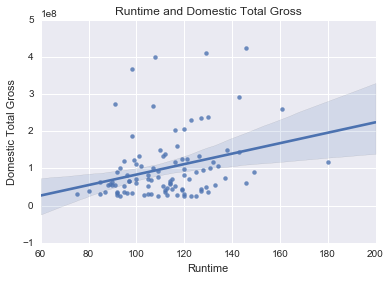

In [148]:
rt_dtg_plot = sns.regplot(x = "Runtime", y = "DomesticTotalGross", data = movie_data)
rt_dtg_plot.set(ylabel = "Domestic Total Gross", title = "Runtime and Domestic Total Gross")

## Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [57]:
movie_data.groupby("Rating").mean()[["DomesticTotalGross", "Runtime"]]

,DomesticTotalGross,Runtime
Rating,,
G,2.684928e+08,107.000000
PG,1.311357e+08,99.933333
PG-13,1.114498e+08,117.510638
R,6.989243e+07,110.729730


## Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [152]:
movie_data_plot = (movie_data[['Rating','ReleaseDate','DomesticTotalGross']]
                   .groupby(['Rating','ReleaseDate'])
                   .mean()
                   .reset_index()
                   )

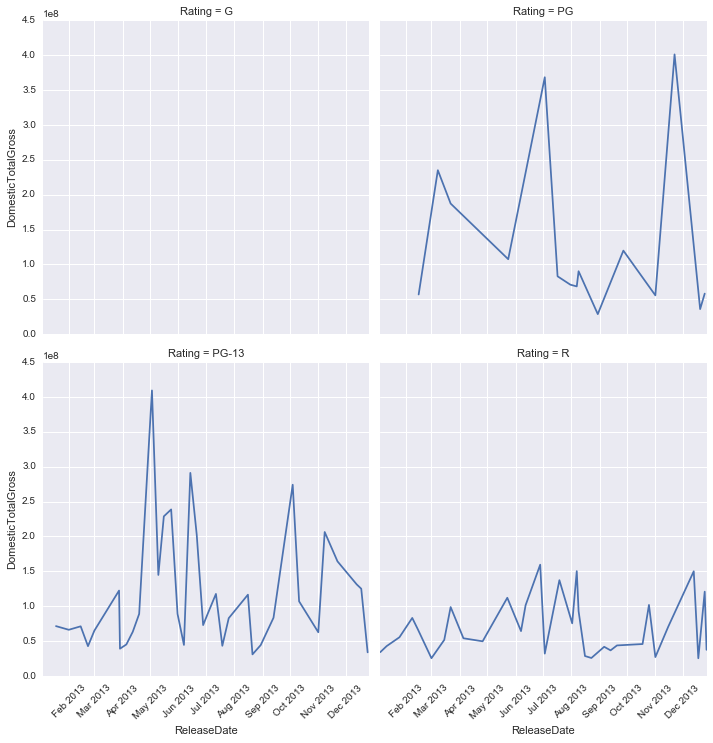

In [153]:
g = sns.FacetGrid(movie_data_plot, col="Rating", size = 5, col_wrap = 2)
g = g.map(plt.plot, 'ReleaseDate', 'DomesticTotalGross')
g.set_xticklabels(rotation=45) 

## Challenge 5

What director in your dataset has the highest gross per movie?

In [160]:
directors_means = movie_data.groupby(["Director"]).mean()
directors_means = directors_means.sort(columns = "DomesticTotalGross")
directors_means.iloc[0]

Budget                23000000
DomesticTotalGross    25568251
Runtime                    120
Month                       12
Name: Spike Jonze, dtype: float64


Spike Jonze has the highest average gross per movie

## Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

In [89]:
movie_data["Month"] = movie_data["ReleaseDate"].apply(lambda x: x.month)

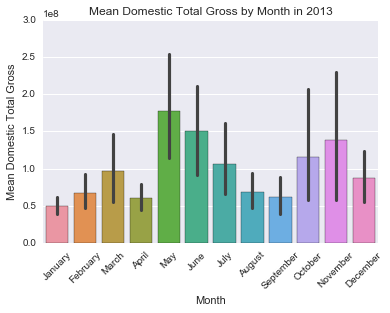

In [118]:
barplot = sns.barplot(x = "Month", y = "DomesticTotalGross", data = movie_data)
barplot.set(ylabel = "Mean Domestic Total Gross", title = "Mean Domestic Total Gross by Month in 2013")
month_list = [calendar.month_name[i] for i in range(1, 13)]
barplot.set(xticklabels=month_list)
for item in barplot.get_xticklabels():
    item.set_rotation(45)
